<font size=5>第 1 章 解析方法与几何模型 </font>

<font size=4>1.5 节的示例</font>

>整理自
>
>开源内容：https://github.com/datawhalechina/intro-mathmodel
>
>在线学习网站：http://www.datawhale.cn/learn/summary/85

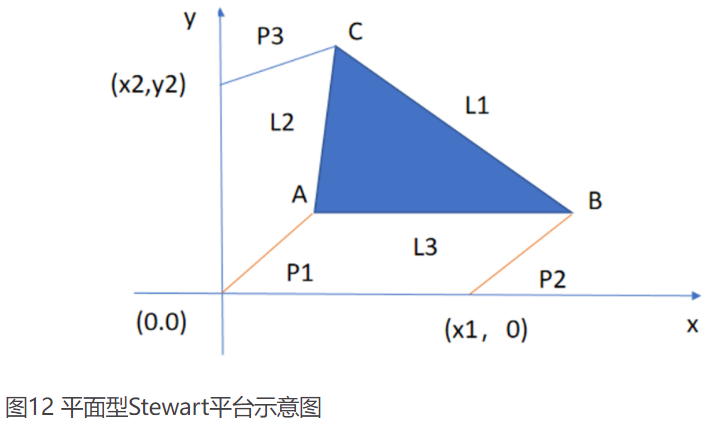

图 12 给出的是平面型 Stewart 平台示意图，它模拟一个操作装置，其中包括一个三角形 ($ABC$) 平台，平台位于一个由 3 个支柱 ($P_{1}$, $P_{2}$ 和 $P_{3}$) 控制的固定平面中。

图中的三角形 ($ABC$) 表示平面型 Stewart 平台，它的尺寸由 3 个长度 $L_{1}$，$L_{2}$，$L_{3}$ 确定。平台的位置由 $3$ 个支柱的可变长度的 $3$ 个参数 $P_{1}$，$P_{2}$，$P_{3}$ 所控制。

需要解决的问题是，在给定一组参数 $P_{1}$，$P_{2}$，$P_{3}$ 的值后，计算出 $A$ 点的坐标 $(x, y)$ 和角度 $\theta$ 的值 ($\theta$ 是 $L_{3}$ 与 $x$ 轴的夹角)。请你完成：

1、数学建模：参数 $L_{1}, L_{2}, L_{3}, x_{1}, x_{2}, y_{2}$ 是固定常数，在给定一组参数 $P_{1}, P_{2}, P_{3}$ 的值后，判断能否得到 Stewart 平台的一个位置，即能否得到 $A$ 点坐标 $(x, y)$ 和角度 $\theta$ 的值。如果能，则称它为 Stewart 平台的一个位姿。但位姿并不一定是唯一的，如何让你的模型能够计算出一组固定参数下的全部位姿。

2、模型检验：假设有如下参数: $x_{1}=5$， $(x_{2}, y_{2})=(0,6)$，$L_{1}=L_{3}=3$，$L_{2}=3$，$P_{1}=P_{2}=5$，$P_{3}=3$，请根据你的模型，计算出 Stewart 平台的全部位姿，即计算出每个 Stewart 平台中的 $A$ 点坐标 $(x, y)$ 和角度 $\theta$ 的值。

## 定义问题的几何关系

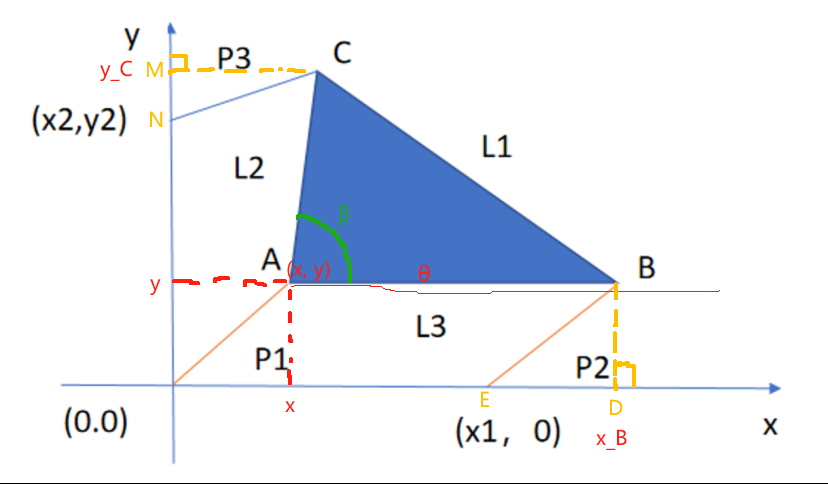

$x^2 + y^2=P_1^2~~~~~~~~~~~~$<font color=blue>方程 1</font>

令 $\beta=\angle CAB$

$\cos \beta=\frac{L_2^2+L_3^2-L_1^2}{2L_2L_3}$

B 点的坐标 $B(x_B, y_B)=\Big(x+L_3\cos\theta,y+L_3\sin \theta\Big)$


C 点的坐标 $C(x_C, y_C)=\Big(x+L_2\cos(\beta+\theta), y+L_2\sin(\beta+\theta)\Big)$

_____


对于 直角三角形 ΔBDE 有： $(x_B-x_1)^2+y_B^2=P_2^2~~~~~~~~~~~~$<font color=blue>方程 2</font>

对于 直角三角形 ΔCMN 有： $(x_C-x_2)^2+(y_C-y_2)^2=P_3^2~~~~~~~~~~~~$<font color=blue>方程 3</font>

## 利用 Scipy 求方程（组）的数值解

In [ ]:
from sympy import symbols, cos, sin, pi, nonlinsolve
import numpy as np

x, y, θ = symbols('x y θ', real=True)
L1, L2, L3 = 3, 3, 3
P1, P2, P3 = 5, 5, 3
x1, x2, y2 = 5, 0, 6

# 计算角 β
β = np.arccos((L2**2 + L3**2 - L1**2)/(2 * L2 * L3))
print(np.rad2deg(β))

# 求解方程组  3 个方程 3 个未知数 x, y, θ
solution = nonlinsolve([
    x**2 + y**2 - P1**2,
    (x + L3*cos(θ)-x1)**2 + (y+L3*sin(θ))**2 - P2**2,
    (x + L2*cos(pi/3+θ)- x2)**2 + ( y+L2*sin(pi/3+θ)- y2)**2 - P3**2], [x, y, θ])

print(solution)

# 求得 β = 60°= pi/3

60.00000000000001


KeyboardInterrupt: 

得到的输出表明，我们没有找到方程组的**解析解** 〔 <font color=red>运行了较长时间都未有输出 </font>〕。在这种情况下，我们转向数值解法，特别是 Scipy 库中的 fsolve 函数，来找到方程组的**数值解**。

* https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.optimize.fsolve.html#fsolve
  

In [ ]:
from scipy.optimize import fsolve
from math import sin, cos, pi

# 定义方程组
def equations(vars):
  x, y,θ= vars
  L1, L2, L3 = 3, 3, 3
  P1, P2, P3 = 5, 5, 3
  x1, x2, y2 = 5, 0, 6

  # 根据问题描述定义的方程
  eq1 = x**2 + y**2 - P1**2
  eq2 = (x + L3*cos(θ) -x1)**2 + (y + L3*sin(θ))**2 - P2**2
  eq3 = (x + L2*cos(pi/3+θ)- x2)**2 + ( y + L2*sin(pi/3 +θ)- y2)**2 - P3**2
  return [eq1, eq2, eq3]

# 初始猜测值  重要， 否则可能无法收敛
initial_guess = [-1.37, 4.80, 0.12]
# 使用 fsolve 求解方程组
result = fsolve(equations, initial_guess)
print(result)

[1.15769945 4.86412705 0.02143414]


brentq 或 bisection：这些函数是用于求解单变量方程的根的，适用于在**指定区间内具有一个根**的情况。

* https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.optimize.brentq.html#brentq


* https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.optimize.bisect.html

root：这个函数提供了一个更加通用的接口来求解多变量方程组的根，它允许选择不同的算法，比如 hybr, lm, broyden1, 等等。

newton：用于求解单变量方程的根，当你有方程的**导数信息**时特别有用。


对于复杂的方程组，尤其是当**没有解析解时**，**使用数值方法**通常是解决问题的可行方式。在使用数值方法时，很重要的一点是要**有一个合理的初始猜测**，因为这些方法很大程度上依赖于起始点，并且可能收敛到局部解，或者在某些情况下可能根本不收敛。